#  ¡¡ NATIONAL BASKETBALL ASSOCIATION !!  #

![nba](https://media.giphy.com/media/3oriNUHm08iuTga3zG/giphy.gif)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from lxml import html
from lxml.html import fromstring
from urllib.request import urlopen
import re
import matplotlib.pyplot as plt


In [2]:
url = "https://es.wikipedia.org/wiki/National_Basketball_Association"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
result=soup.find_all("table", attrs = {"class": "wikitable"})
df1 = pd.read_html(str(result))[0]
df1



Conferencia Oeste                                              \
            División                  Equipo              Ciudad   
0           Noroeste          Denver Nuggets          Denver, CO   
1           Noroeste  Minnesota Timberwolves      Mineápolis, MN   
2           Noroeste   Oklahoma City Thunder   Oklahoma City, OK   
3           Noroeste  Portland Trail Blazers        Portland, OR   
4           Noroeste               Utah Jazz  Salt Lake City, UT   
5           Suroeste        Dallas Mavericks          Dallas, TX   
6           Suroeste         Houston Rockets         Houston, TX   
7           Suroeste       Memphis Grizzlies         Memphis, TN   
8           Suroeste    New Orleans Pelicans   Nueva Orleans, LA   
9           Suroeste       San Antonio Spurs     San Antonio, TX   
10          Pacífico   Golden State Warriors   San Francisco, CA   
11          Pacífico    Los Angeles Clippers     Los Ángeles, CA   
12          Pacífico      Los Angeles Lakers     Los Ángeles, CA   
13          Pacífico            Phoenix Suns         Phoenix, AZ   
14          Pacífico        Sacramento Kings      Sacramento, CA   

                                                          
                    Pabellón Fundado          Patrocinio  
0                 Ball Arena    1967       Western Union  
1              Target Center    1989             ninguno  
2              Paycom Center   1967*              Love's  
3                Moda Center    1970  Performance Health  
4               Vivint Arena   1974*           Qualtrics  
5   American Airlines Center    1980               Chime  
6              Toyota Center   1967*             ninguno  
7                 FedExForum   1995*               FedEx  
8       Smoothie King Center   1988*              Ibotta  
9                AT&T Center   1967*          Frost Bank  
10              Chase Center   1946*             Rakuten  
11          Crypto.com Arena   1970*               Honey  
12          Crypto.com Arena   1946*                Wish  
13          Footprint Center    1968              PayPal  
14           Golden 1 Center   1945*             ninguno

In [3]:
table1 = {
    'División': ['Noroeste', 'Noroeste', 'Noroeste', 'Noroeste', 'Noroeste', 'Suroeste', 'Suroeste', 'Suroeste', 'Suroeste', 'Suroeste', 'Pacífico', 'Pacífico', 'Pacífico', 'Pacífico', 'Pacífico'],
    'Equipo': ['Denver Nuggets', 'Minnesota Timberwolves', 'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz', 'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies', 'New Orleans Pelicans', 'San Antonio Spurs', 'Golden State Warriors', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns', 'Sacramento Kings'],
    'Ciudad': ['Denver, CO', 'Mineápolis, MN', 'Oklahoma City, OK', 'Portland, OR', 'Salt Lake City, UT', 'Dallas, TX', 'Houston, TX', 'Memphis, TN', 'Nueva Orleans, LA', 'San Antonio, TX', 'San Francisco, CA', 'Los Ángeles, CA', 'Los Ángeles, CA', 'Phoenix, AZ', 'Sacramento, CA'],
    'Pabellón': ['Ball Arena', 'Target Center', 'Paycom Center', 'Moda Center', 'Vivint Arena', 'American Airlines Center', 'Toyota Center', 'FedExForum', 'Smoothie King Center', 'AT&T Center', 'Chase Center', 'Crypto.com Arena', 'Crypto.com Arena', 'Footprint Center', 'Golden 1 Center'],
    'Fundado': ['1967', '1989', '1967*', '1970', '1974*', '1980', '1967*', '1995*', '1988*', '1967*', '1946*', '1970*', '1946*', '1968', '1945*'],
    'Patrocinio': ['Western Union', 'ninguno', 'Love\'s', 'Performance Health', 'Qualtrics', 'Chime', 'ninguno', 'FedEx', 'Ibotta', 'Frost Bank', 'Rakuten', 'Honey', 'Wish', 'PayPal', 'ninguno']
}

df1_1 = pd.DataFrame(table1)
df1_1['Conferencia'] = 'Oeste'
df1_1

,División,Equipo,Ciudad,Pabellón,Fundado,Patrocinio,Conferencia
0,Noroeste,Denver Nuggets,"Denver, CO",Ball Arena,1967,Western Union,Oeste
1,Noroeste,Minnesota Timberwolves,"Mineápolis, MN",Target Center,1989,ninguno,Oeste
2,Noroeste,Oklahoma City Thunder,"Oklahoma City, OK",Paycom Center,1967*,Love's,Oeste
3,Noroeste,Portland Trail Blazers,"Portland, OR",Moda Center,1970,Performance Health,Oeste
4,Noroeste,Utah Jazz,"Salt Lake City, UT",Vivint Arena,1974*,Qualtrics,Oeste
5,Suroeste,Dallas Mavericks,"Dallas, TX",American Airlines Center,1980,Chime,Oeste
6,Suroeste,Houston Rockets,"Houston, TX",Toyota Center,1967*,ninguno,Oeste
7,Suroeste,Memphis Grizzlies,"Memphis, TN",FedExForum,1995*,FedEx,Oeste
8,Suroeste,New Orleans Pelicans,"Nueva Orleans, LA",Smoothie King Center,1988*,Ibotta,Oeste
9,Suroeste,San Antonio Spurs,"San Antonio, TX",AT&T Center,1967*,Frost Bank,Oeste


In [4]:
url = "https://es.wikipedia.org/wiki/National_Basketball_Association"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
result=soup.find_all("table", attrs = {"class": "wikitable"})
df2 = pd.read_html(str(result))[1]
df2


Conferencia Este                                            \
           División               Equipo               Ciudad   
0         Atlántico       Boston Celtics           Boston, MA   
1         Atlántico        Brooklyn Nets       Nueva York, NY   
2         Atlántico      New York Knicks       Nueva York, NY   
3         Atlántico   Philadelphia 76ers       Filadelfia, PA   
4         Atlántico      Toronto Raptors  Toronto, ON, Canadá   
5           Central        Chicago Bulls          Chicago, IL   
6           Central  Cleveland Cavaliers        Cleveland, OH   
7           Central      Detroit Pistons          Detroit, MI   
8           Central       Indiana Pacers     Indianápolis, IN   
9           Central      Milwaukee Bucks        Milwaukee, WI   
10          Sureste        Atlanta Hawks          Atlanta, GA   
11          Sureste    Charlotte Hornets        Charlotte, NC   
12          Sureste           Miami Heat            Miami, FL   
13          Sureste        Orlando Magic          Orlando, FL   
14          Sureste   Washington Wizards     Washington D. C.   

                                                       
                      Pabellón Fundado     Patrocinio  
0                    TD Garden    1946     Vistaprint  
1              Barclays Center   1967*       Motorola  
2        Madison Square Garden    1946    Squarespace  
3           Wells Fargo Center   1939*        StubHub  
4             Scotiabank Arena    1995       Sun Life  
5                United Center    1966  Zenni Optical  
6   Rocket Mortgage FieldHouse    1970       Goodyear  
7         Little Caesars Arena   1941*  Flagstar Bank  
8        Gainbridge Fieldhouse    1967       Motorola  
9                 Fiserv Forum    1968       Motorola  
10            State Farm Arena   1946*      Sharecare  
11             Spectrum Center    1988    LendingTree  
12                   FTX Arena    1988            UKG  
13                Amway Center    1989   Disney World  
14           Capital One Arena   1961*          GEICO

In [5]:
table2 = {
    'División': ['Atlántico', 'Atlántico', 'Atlántico', 'Atlántico', 'Atlántico', 'Central', 'Central', 'Central', 'Central', 'Central', 'Sureste', 'Sureste', 'Sureste', 'Sureste', 'Sureste'],
    'Equipo': ['Boston Celtics', 'Brooklyn Nets', 'New York Knicks', 'Philadelphia 76ers', 'Toronto Raptors', 'Chicago Bulls', 'Cleveland Cavaliers', 'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks', 'Atlanta Hawks', 'Charlotte Hornets', 'Miami Heat', 'Orlando Magic', 'Washington Wizards'],
    'Ciudad': ['Boston, MA', 'Nueva York, NY', 'Nueva York, NY', 'Filadelfia, PA', 'Toronto, ON, Canadá', 'Chicago, IL', 'Cleveland, OH', 'Detroit, MI', 'Indianápolis, IN', 'Milwaukee, WI', 'Atlanta, GA', 'Charlotte, NC', 'Miami, FL', 'Orlando, FL', 'Washington D. C.'],
    'Pabellón': ['TD Garden', 'Barclays Center', 'Madison Square Garden', 'Wells Fargo Center', 'Scotiabank Arena', 'United Center', 'Rocket Mortgage FieldHouse', 'Little Caesars Arena', 'Gainbridge Fieldhouse', 'Fiserv Forum', 'State Farm Arena', 'Spectrum Center', 'FTX Arena', 'Amway Center', 'Capital One Arena'],
    'Fundado': ['1946', '1967*', '1946', '1939*', '1995', '1966', '1970', '1941*', '1967', '1968', '1946*', '1988', '1988', '1989', '1961*'],
    'Patrocinio': ['Vistaprint', 'Motorola', 'Squarespace', 'StubHub', 'Sun Life', 'Zenni Optical', 'Goodyear', 'Flagstar Bank', 'Motorola', 'Motorola', 'Sharecare', 'LendingTree', 'UKG', 'Disney World', 'GEICO']
}

df2_1 = pd.DataFrame(table2)
df2_1['Conferencia'] = 'Este'
df2_1



,División,Equipo,Ciudad,Pabellón,Fundado,Patrocinio,Conferencia
0,Atlántico,Boston Celtics,"Boston, MA",TD Garden,1946,Vistaprint,Este
1,Atlántico,Brooklyn Nets,"Nueva York, NY",Barclays Center,1967*,Motorola,Este
2,Atlántico,New York Knicks,"Nueva York, NY",Madison Square Garden,1946,Squarespace,Este
3,Atlántico,Philadelphia 76ers,"Filadelfia, PA",Wells Fargo Center,1939*,StubHub,Este
4,Atlántico,Toronto Raptors,"Toronto, ON, Canadá",Scotiabank Arena,1995,Sun Life,Este
5,Central,Chicago Bulls,"Chicago, IL",United Center,1966,Zenni Optical,Este
6,Central,Cleveland Cavaliers,"Cleveland, OH",Rocket Mortgage FieldHouse,1970,Goodyear,Este
7,Central,Detroit Pistons,"Detroit, MI",Little Caesars Arena,1941*,Flagstar Bank,Este
8,Central,Indiana Pacers,"Indianápolis, IN",Gainbridge Fieldhouse,1967,Motorola,Este
9,Central,Milwaukee Bucks,"Milwaukee, WI",Fiserv Forum,1968,Motorola,Este


In [6]:
df3 = pd.concat([df1_1, df2_1], axis=0)
df3


,División,Equipo,Ciudad,Pabellón,Fundado,Patrocinio,Conferencia
0,Noroeste,Denver Nuggets,"Denver, CO",Ball Arena,1967,Western Union,Oeste
1,Noroeste,Minnesota Timberwolves,"Mineápolis, MN",Target Center,1989,ninguno,Oeste
2,Noroeste,Oklahoma City Thunder,"Oklahoma City, OK",Paycom Center,1967*,Love's,Oeste
3,Noroeste,Portland Trail Blazers,"Portland, OR",Moda Center,1970,Performance Health,Oeste
4,Noroeste,Utah Jazz,"Salt Lake City, UT",Vivint Arena,1974*,Qualtrics,Oeste
5,Suroeste,Dallas Mavericks,"Dallas, TX",American Airlines Center,1980,Chime,Oeste
6,Suroeste,Houston Rockets,"Houston, TX",Toyota Center,1967*,ninguno,Oeste
7,Suroeste,Memphis Grizzlies,"Memphis, TN",FedExForum,1995*,FedEx,Oeste
8,Suroeste,New Orleans Pelicans,"Nueva Orleans, LA",Smoothie King Center,1988*,Ibotta,Oeste
9,Suroeste,San Antonio Spurs,"San Antonio, TX",AT&T Center,1967*,Frost Bank,Oeste


In [7]:
df4 = df3.drop(['Pabellón', 'Fundado', 'Patrocinio'], axis=1)

df4

,División,Equipo,Ciudad,Conferencia
0,Noroeste,Denver Nuggets,"Denver, CO",Oeste
1,Noroeste,Minnesota Timberwolves,"Mineápolis, MN",Oeste
2,Noroeste,Oklahoma City Thunder,"Oklahoma City, OK",Oeste
3,Noroeste,Portland Trail Blazers,"Portland, OR",Oeste
4,Noroeste,Utah Jazz,"Salt Lake City, UT",Oeste
5,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste
6,Suroeste,Houston Rockets,"Houston, TX",Oeste
7,Suroeste,Memphis Grizzlies,"Memphis, TN",Oeste
8,Suroeste,New Orleans Pelicans,"Nueva Orleans, LA",Oeste
9,Suroeste,San Antonio Spurs,"San Antonio, TX",Oeste


In [8]:


df5 = df4.sort_values('Equipo')


df5


,División,Equipo,Ciudad,Conferencia
10,Sureste,Atlanta Hawks,"Atlanta, GA",Este
0,Atlántico,Boston Celtics,"Boston, MA",Este
1,Atlántico,Brooklyn Nets,"Nueva York, NY",Este
11,Sureste,Charlotte Hornets,"Charlotte, NC",Este
5,Central,Chicago Bulls,"Chicago, IL",Este
6,Central,Cleveland Cavaliers,"Cleveland, OH",Este
5,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste
0,Noroeste,Denver Nuggets,"Denver, CO",Oeste
7,Central,Detroit Pistons,"Detroit, MI",Este
10,Pacífico,Golden State Warriors,"San Francisco, CA",Oeste


In [9]:
df6 = df5.reset_index(drop=True)
df6

,División,Equipo,Ciudad,Conferencia
0,Sureste,Atlanta Hawks,"Atlanta, GA",Este
1,Atlántico,Boston Celtics,"Boston, MA",Este
2,Atlántico,Brooklyn Nets,"Nueva York, NY",Este
3,Sureste,Charlotte Hornets,"Charlotte, NC",Este
4,Central,Chicago Bulls,"Chicago, IL",Este
5,Central,Cleveland Cavaliers,"Cleveland, OH",Este
6,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste
7,Noroeste,Denver Nuggets,"Denver, CO",Oeste
8,Central,Detroit Pistons,"Detroit, MI",Este
9,Pacífico,Golden State Warriors,"San Francisco, CA",Oeste


In [10]:

table3 = {'Equipo': ['Los Angeles Lakers', 'Boston Celtics', 'Golden State Warriors', 'Chicago Bulls', 'San Antonio Spurs', 'Philadelphia 76ers', 'Detroit Pistons', 'Miami Heat', 'New York Knicks', 'Houston Rockets', 'Milwaukee Bucks', 'Cleveland Cavaliers', 'Atlanta Hawks', 'Washington Wizards', 'Oklahoma City Thunder', 'Portland Trail Blazers', 'Dallas Mavericks', 'Baltimore Bullets', 'Sacramento Kings', 'Toronto Raptors', 'Phoenix Suns', 'Brooklyn Nets', 'Orlando Magic', 'Utah Jazz', 'Indiana Pacers', 'Chicago Stags', 'Washington Capitols', 'Seattle Supersonics'],
        'Campeonatos': [6, 1, 4, 6, 5, '-', 2, 3, '-', 2, 1, 1, '-', '-', '-', '-', 1, '-', '-', 1, '-', '-', '-', '-', '-', '-', '-', '-' ], 
          'Títulos': [['2000', '2001', '2002', '2009', '2010', '2020'], 
                ['2008'], 
                ['2015', '2017', '2018', '2022'], 
                ['1991', '1992', '1993', '1996', '1997', '1998'], 
                ['1999', '2003', '2005', '2007', '2014'],
                [],
                ['1990', '2004'], 
                ['2006', '2012', '2013'], 
                [], 
                ['1994', '1995'], 
                ['2021'], 
                ['2016'], 
                [], 
                [], 
                [], 
                [], 
                ['2011'], 
                [], 
                [], 
                ['2019'], 
                [], 
                [], 
                [], 
                [], 
                [], 
                [], 
                [], []] } 

df_palmares = pd.DataFrame(table3)

df_palmares



,Equipo,Campeonatos,Títulos
0,Los Angeles Lakers,6,"[2000, 2001, 2002, 2009, 2010, 2020]"
1,Boston Celtics,1,[2008]
2,Golden State Warriors,4,"[2015, 2017, 2018, 2022]"
3,Chicago Bulls,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
4,San Antonio Spurs,5,"[1999, 2003, 2005, 2007, 2014]"
5,Philadelphia 76ers,-,[]
6,Detroit Pistons,2,"[1990, 2004]"
7,Miami Heat,3,"[2006, 2012, 2013]"
8,New York Knicks,-,[]
9,Houston Rockets,2,"[1994, 1995]"


In [11]:
df7 = pd.merge(df6, df_palmares, on='Equipo', how='outer')

df7

,División,Equipo,Ciudad,Conferencia,Campeonatos,Títulos
0,Sureste,Atlanta Hawks,"Atlanta, GA",Este,-,[]
1,Atlántico,Boston Celtics,"Boston, MA",Este,1,[2008]
2,Atlántico,Brooklyn Nets,"Nueva York, NY",Este,-,[]
3,Sureste,Charlotte Hornets,"Charlotte, NC",Este,NaN,NaN
4,Central,Chicago Bulls,"Chicago, IL",Este,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
5,Central,Cleveland Cavaliers,"Cleveland, OH",Este,1,[2016]
6,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste,1,[2011]
7,Noroeste,Denver Nuggets,"Denver, CO",Oeste,NaN,NaN
8,Central,Detroit Pistons,"Detroit, MI",Este,2,"[1990, 2004]"
9,Pacífico,Golden State Warriors,"San Francisco, CA",Oeste,4,"[2015, 2017, 2018, 2022]"


In [12]:
df7.fillna('-', inplace=True)
df7


,División,Equipo,Ciudad,Conferencia,Campeonatos,Títulos
0,Sureste,Atlanta Hawks,"Atlanta, GA",Este,-,[]
1,Atlántico,Boston Celtics,"Boston, MA",Este,1,[2008]
2,Atlántico,Brooklyn Nets,"Nueva York, NY",Este,-,[]
3,Sureste,Charlotte Hornets,"Charlotte, NC",Este,-,-
4,Central,Chicago Bulls,"Chicago, IL",Este,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
5,Central,Cleveland Cavaliers,"Cleveland, OH",Este,1,[2016]
6,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste,1,[2011]
7,Noroeste,Denver Nuggets,"Denver, CO",Oeste,-,-
8,Central,Detroit Pistons,"Detroit, MI",Este,2,"[1990, 2004]"
9,Pacífico,Golden State Warriors,"San Francisco, CA",Oeste,4,"[2015, 2017, 2018, 2022]"


In [13]:

df8 = df7.sort_values('Equipo')

df8


,División,Equipo,Ciudad,Conferencia,Campeonatos,Títulos
0,Sureste,Atlanta Hawks,"Atlanta, GA",Este,-,[]
30,-,Baltimore Bullets,-,-,-,[]
1,Atlántico,Boston Celtics,"Boston, MA",Este,1,[2008]
2,Atlántico,Brooklyn Nets,"Nueva York, NY",Este,-,[]
3,Sureste,Charlotte Hornets,"Charlotte, NC",Este,-,-
4,Central,Chicago Bulls,"Chicago, IL",Este,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
31,-,Chicago Stags,-,-,-,[]
5,Central,Cleveland Cavaliers,"Cleveland, OH",Este,1,[2016]
6,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste,1,[2011]
7,Noroeste,Denver Nuggets,"Denver, CO",Oeste,-,-


In [14]:
df9= df8.reset_index(drop=True)
df9



,División,Equipo,Ciudad,Conferencia,Campeonatos,Títulos
0,Sureste,Atlanta Hawks,"Atlanta, GA",Este,-,[]
1,-,Baltimore Bullets,-,-,-,[]
2,Atlántico,Boston Celtics,"Boston, MA",Este,1,[2008]
3,Atlántico,Brooklyn Nets,"Nueva York, NY",Este,-,[]
4,Sureste,Charlotte Hornets,"Charlotte, NC",Este,-,-
5,Central,Chicago Bulls,"Chicago, IL",Este,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
6,-,Chicago Stags,-,-,-,[]
7,Central,Cleveland Cavaliers,"Cleveland, OH",Este,1,[2016]
8,Suroeste,Dallas Mavericks,"Dallas, TX",Oeste,1,[2011]
9,Noroeste,Denver Nuggets,"Denver, CO",Oeste,-,-


In [15]:
df_titulos = df9.drop(['División', 'Ciudad', 'Conferencia'], axis=1)
pd.set_option('display.max_rows', None)

df_titulos

,Equipo,Campeonatos,Títulos
0,Atlanta Hawks,-,[]
1,Baltimore Bullets,-,[]
2,Boston Celtics,1,[2008]
3,Brooklyn Nets,-,[]
4,Charlotte Hornets,-,-
5,Chicago Bulls,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
6,Chicago Stags,-,[]
7,Cleveland Cavaliers,1,[2016]
8,Dallas Mavericks,1,[2011]
9,Denver Nuggets,-,-


In [16]:
df10= pd.read_csv("data/NBA Payroll(1990-2021).csv", encoding = "latin1")
pd.set_option('display.max_rows', None)

df10

,Unnamed: 0,team,seasonStartYear,payroll,inflationAdjPayroll
0,0,Cleveland,1990,"$14,403,000","$32,854,246"
1,1,New York,1990,"$13,290,000","$30,315,416"
2,2,Detroit,1990,"$12,910,000","$29,448,608"
3,3,LA Lakers,1990,"$12,120,000","$27,646,565"
4,4,Atlanta,1990,"$11,761,000","$26,827,658"
5,5,Dallas,1990,"$11,693,000","$26,672,548"
6,6,Philadelphia,1990,"$11,640,000","$26,551,652"
7,7,Milwaukee,1990,"$11,595,000","$26,449,002"
8,8,Phoenix,1990,"$11,463,000","$26,147,902"
9,9,Brooklyn,1990,"$11,410,000","$26,027,003"


In [17]:
df11 = df10.drop(['Unnamed: 0', 'payroll'], axis=1)
pd.set_option('display.max_rows', None)

df11

,team,seasonStartYear,inflationAdjPayroll
0,Cleveland,1990,"$32,854,246"
1,New York,1990,"$30,315,416"
2,Detroit,1990,"$29,448,608"
3,LA Lakers,1990,"$27,646,565"
4,Atlanta,1990,"$26,827,658"
5,Dallas,1990,"$26,672,548"
6,Philadelphia,1990,"$26,551,652"
7,Milwaukee,1990,"$26,449,002"
8,Phoenix,1990,"$26,147,902"
9,Brooklyn,1990,"$26,027,003"


In [18]:
df12 = df11.rename(columns={'seasonStartYear': 'year', 'inflationAdjPayroll': 'payroll'})
pd.set_option('display.max_rows', None)

df12


,team,year,payroll
0,Cleveland,1990,"$32,854,246"
1,New York,1990,"$30,315,416"
2,Detroit,1990,"$29,448,608"
3,LA Lakers,1990,"$27,646,565"
4,Atlanta,1990,"$26,827,658"
5,Dallas,1990,"$26,672,548"
6,Philadelphia,1990,"$26,551,652"
7,Milwaukee,1990,"$26,449,002"
8,Phoenix,1990,"$26,147,902"
9,Brooklyn,1990,"$26,027,003"


In [19]:
df12['payroll'] = df12['payroll'].replace('[\$,]', '', regex=True).astype(float)


payroll_avg = df12.groupby('team')['payroll'].mean()


payroll_avg

team
Atlanta          8.192792e+07
Boston           9.159851e+07
Brooklyn         9.590589e+07
Charlotte        7.724473e+07
Chicago          8.627169e+07
Cleveland        9.176452e+07
Dallas           9.608268e+07
Denver           8.423284e+07
Detroit          8.412200e+07
Golden State     9.295158e+07
Houston          8.749288e+07
Indiana          8.967985e+07
LA Clippers      8.463992e+07
LA Lakers        1.009523e+08
Memphis          9.386792e+07
Miami            9.456098e+07
Milwaukee        8.805290e+07
Minnesota        8.596684e+07
New Orleans      1.049777e+08
New York         1.100092e+08
Oklahoma City    8.310581e+07
Orlando          8.967338e+07
Philadelphia     9.017315e+07
Phoenix          8.675528e+07
Portland         1.009973e+08
Sacramento       8.323766e+07
San Antonio      8.965840e+07
Toronto          9.610857e+07
Utah             8.375453e+07
Washington       8.730214e+07
Name: payroll, dtype: float64

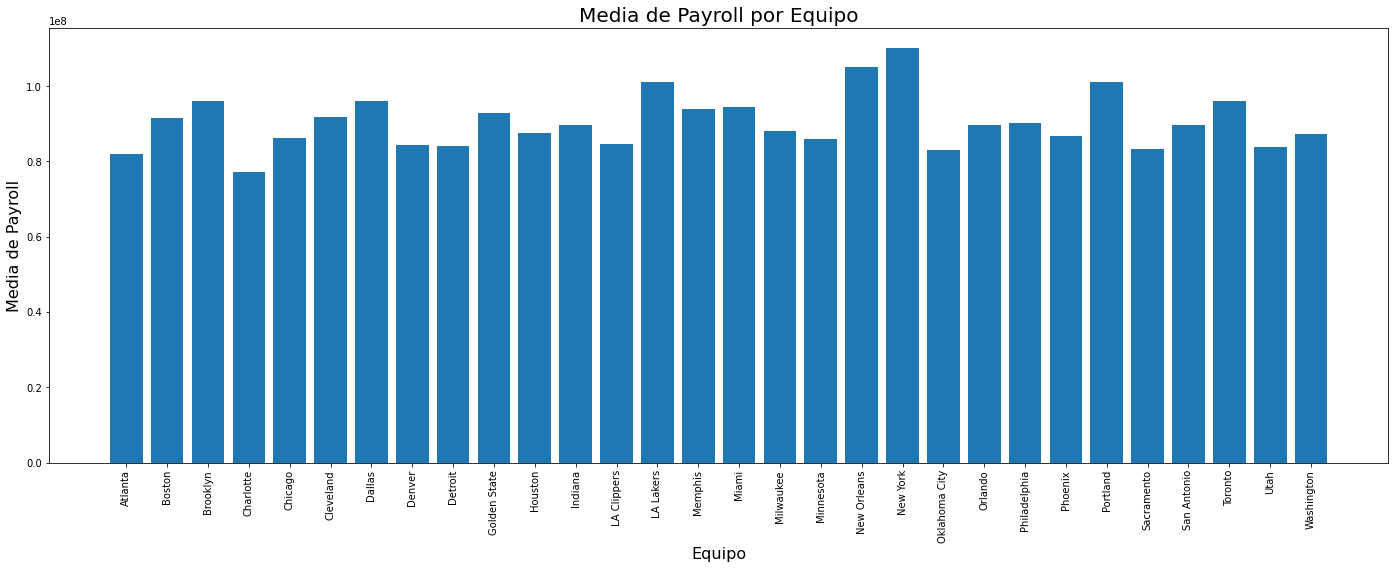

In [20]:

plt.figure(figsize=(24, 8))
plt.bar(payroll_avg.index, payroll_avg.values)


plt.title('Media de Payroll por Equipo', fontsize=20)
plt.xlabel('Equipo', fontsize=16)
plt.ylabel('Media de Payroll', fontsize=16)


plt.xticks(rotation=90)


plt.show()


In [21]:

df_titulos


,Equipo,Campeonatos,Títulos
0,Atlanta Hawks,-,[]
1,Baltimore Bullets,-,[]
2,Boston Celtics,1,[2008]
3,Brooklyn Nets,-,[]
4,Charlotte Hornets,-,-
5,Chicago Bulls,6,"[1991, 1992, 1993, 1996, 1997, 1998]"
6,Chicago Stags,-,[]
7,Cleveland Cavaliers,1,[2016]
8,Dallas Mavericks,1,[2011]
9,Denver Nuggets,-,-


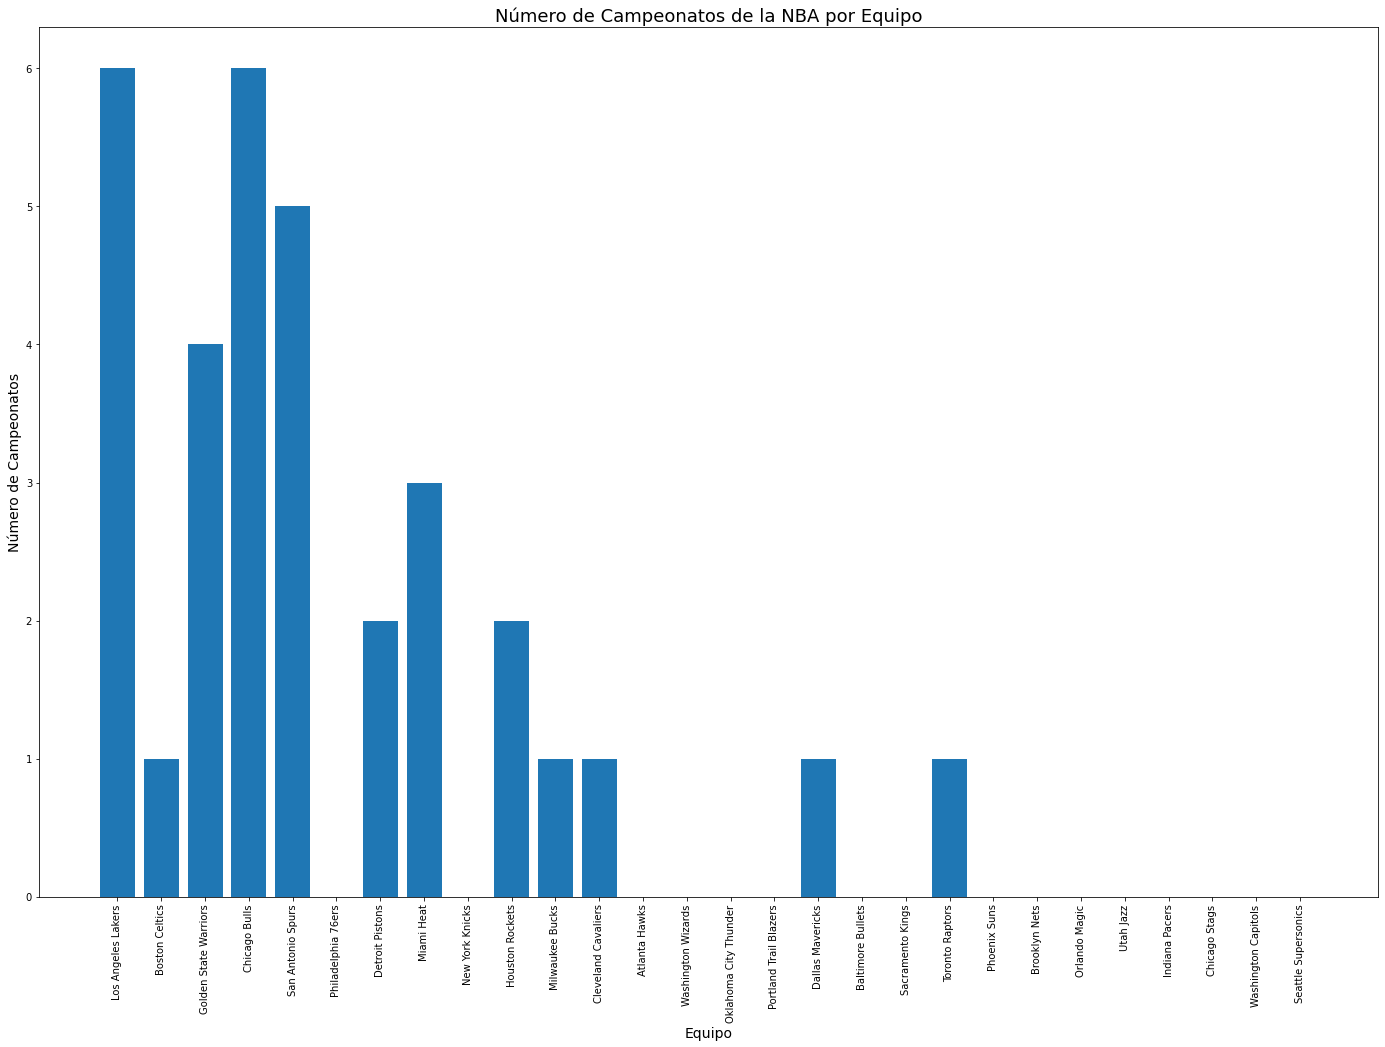

In [22]:

equipos = ['Los Angeles Lakers', 'Boston Celtics', 'Golden State Warriors', 'Chicago Bulls', 'San Antonio Spurs', 'Philadelphia 76ers', 'Detroit Pistons', 'Miami Heat', 'New York Knicks', 'Houston Rockets', 'Milwaukee Bucks', 'Cleveland Cavaliers', 'Atlanta Hawks', 'Washington Wizards', 'Oklahoma City Thunder', 'Portland Trail Blazers', 'Dallas Mavericks', 'Baltimore Bullets', 'Sacramento Kings', 'Toronto Raptors', 'Phoenix Suns', 'Brooklyn Nets', 'Orlando Magic', 'Utah Jazz', 'Indiana Pacers', 'Chicago Stags', 'Washington Capitols', 'Seattle Supersonics']
campeonatos = [6, 1, 4, 6, 5, 0, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


fig, ax = plt.subplots(figsize=(24, 16))
ax.bar(equipos, campeonatos)


ax.set_title('Número de Campeonatos de la NBA por Equipo', fontsize=18)
ax.set_xlabel('Equipo', fontsize=14)
ax.set_ylabel('Número de Campeonatos', fontsize=14)


plt.xticks(rotation=90)


plt.show()

